In [2]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [3]:
#import Data
# link Data: https://www.kaggle.com/rajanand/fdi-in-india/data
india_file= 'FDI_in_India.csv'
india=pd.read_csv(india_file,
                       header=0,
                       sep=',',
                       index_col=0,
                       parse_dates=False,
                       skip_blank_lines=True)
india

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40
BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91
PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88
ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69


In [4]:
#data quality reports
def datareport(Datos):
    india=Datos.transpose()
    columns=list(india.columns.values)
    data_type=pd.DataFrame(india.dtypes,columns=['Data type'])
    missing_data_counts=pd.DataFrame(india.isnull().sum(),columns=['missing values'])                     
    present_data_couts=pd.DataFrame(india.count(),columns=['present values'])
    unique_values_counts=pd.DataFrame(columns=['unique values'])

    for v in list(india.columns.values):
        unique_values_counts.loc[v]=[india[v].nunique()]    
        
    minimum_values=pd.DataFrame(columns=['minimum values'])  
    for v in list(india.columns.values):
       try: 
        minimum_values.loc[v]=[india[v].min()]    
       except:
        pass                    

    max_values=pd.DataFrame(columns=['maximun values'])         
    for v in list(india.columns.values):
        max_values.loc[v]=[india[v].max()]  
 
    data_quality_report=data_type.join(missing_data_counts).join(present_data_couts).join(unique_values_counts).join(minimum_values).join(max_values)
    quick_report=india.describe().transpose()
    
    print (data_quality_report)
    print (quick_report)
    return [quick_report]

In [5]:
# llamar función "datareport"
datareport(india)

                                                   Data type  missing values  \
Sector                                                                         
METALLURGICAL INDUSTRIES                             float64               0   
MINING                                               float64               0   
POWER                                                float64               0   
NON-CONVENTIONAL ENERGY                              float64               0   
COAL PRODUCTION                                      float64               0   
PETROLEUM & NATURAL GAS                              float64               0   
BOILERS AND STEAM GENERATING PLANTS                  float64               0   
PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)       float64               0   
ELECTRICAL EQUIPMENTS                                float64               0   
COMPUTER SOFTWARE & HARDWARE                         float64               0   
ELECTRONICS                             

[                                                    count         mean  \
 Sector                                                                   
 METALLURGICAL INDUSTRIES                             17.0   607.678824   
 MINING                                               17.0   133.637059   
 POWER                                                17.0   681.713529   
 NON-CONVENTIONAL ENERGY                              17.0   304.793529   
 COAL PRODUCTION                                      17.0     1.631765   
 PETROLEUM & NATURAL GAS                              17.0   403.303529   
 BOILERS AND STEAM GENERATING PLANTS                  17.0    11.479412   
 PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)       17.0   102.244706   
 ELECTRICAL EQUIPMENTS                                17.0   386.318235   
 COMPUTER SOFTWARE & HARDWARE                         17.0  1451.146471   
 ELECTRONICS                                          17.0   101.175294   
 TELECOMMUNICATIONS      

In [6]:
%matplotlib inline

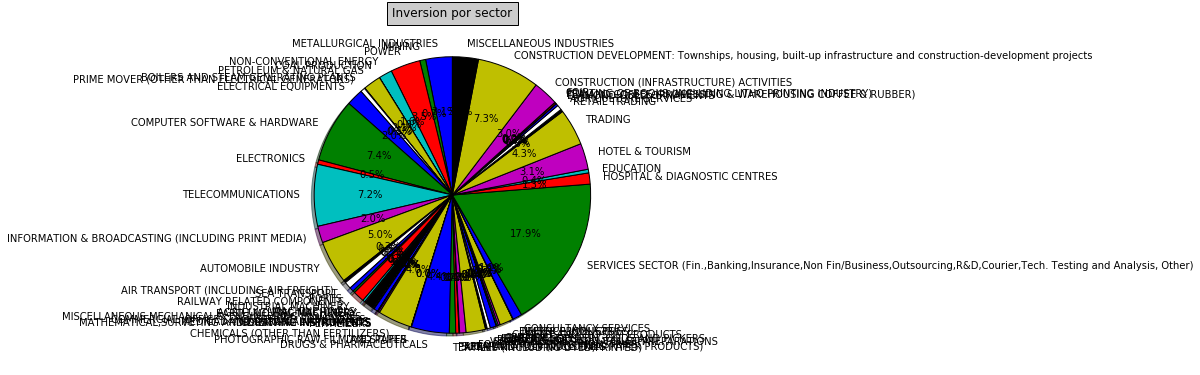

In [7]:
#gráfica de pastel (inversión por sector)
india=india.transpose()
descrip=india.describe()
quick_report=india.describe().transpose()
suma=quick_report['mean'].sum()
propor=quick_report['mean']/suma

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = list(india.columns.values)
fracs = propor

pie(fracs,labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Inversion por sector', bbox={'facecolor':'0.8', 'pad':5})

show()


In [8]:
#%%crecimiento promedio anual
india=india.replace(0,0.01)     
crecimiento=india.iloc[16,:]/india.iloc[0,:]
crecimiento=pd.DataFrame(crecimiento).transpose()
cpa=crecimiento**(1/17.0)-1
cpa=cpa.transpose()
print(cpa)

                                                           0
Sector                                                      
METALLURGICAL INDUSTRIES                            0.276539
MINING                                              0.246315
POWER                                               0.159885
NON-CONVENTIONAL ENERGY                             0.940381
COAL PRODUCTION                                     0.000000
PETROLEUM & NATURAL GAS                             0.190182
BOILERS AND STEAM GENERATING PLANTS                 0.657715
PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)      0.829017
ELECTRICAL EQUIPMENTS                               0.216459
COMPUTER SOFTWARE & HARDWARE                        0.177099
ELECTRONICS                                         0.145506
TELECOMMUNICATIONS                                  0.224566
INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)  0.187655
AUTOMOBILE INDUSTRY                                 0.132074
AIR TRANSPORT (INCLUDING

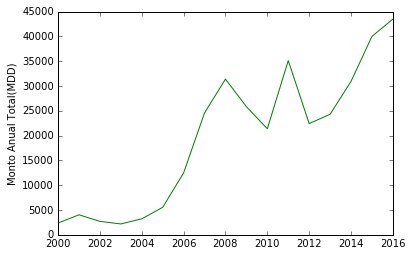

C:\Users\Edu\Anaconda3\lib\site-packages\numpy\core\numeric.py:294: FutureWarning: in the future, full((1, 16), 0) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


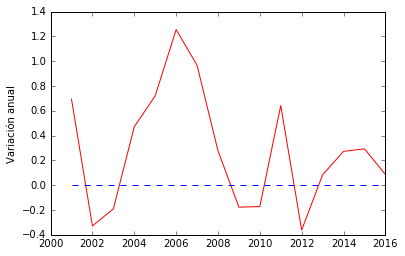

In [9]:
#%% inversion anual total
Invt=pd.DataFrame(india.sum(axis=1))
años= list([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
plt.plot(años,Invt.loc[:,0],'green')
plt.ylabel('Monto Anual Total(MDD)')
plt.show()
df=Invt.pct_change(periods=1)
crecimientotal=df.drop(df.index[0])
años= list([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
cero=pd.DataFrame(np.full((1,16),0)).transpose()
plt.plot(años,crecimientotal.loc[:,0],'red',años,cero,'b--')
#plt.plot(años,pd)
plt.ylabel('Variación anual')
plt.show()

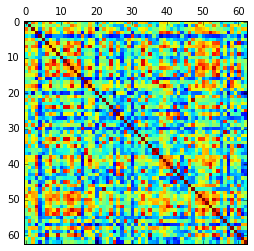

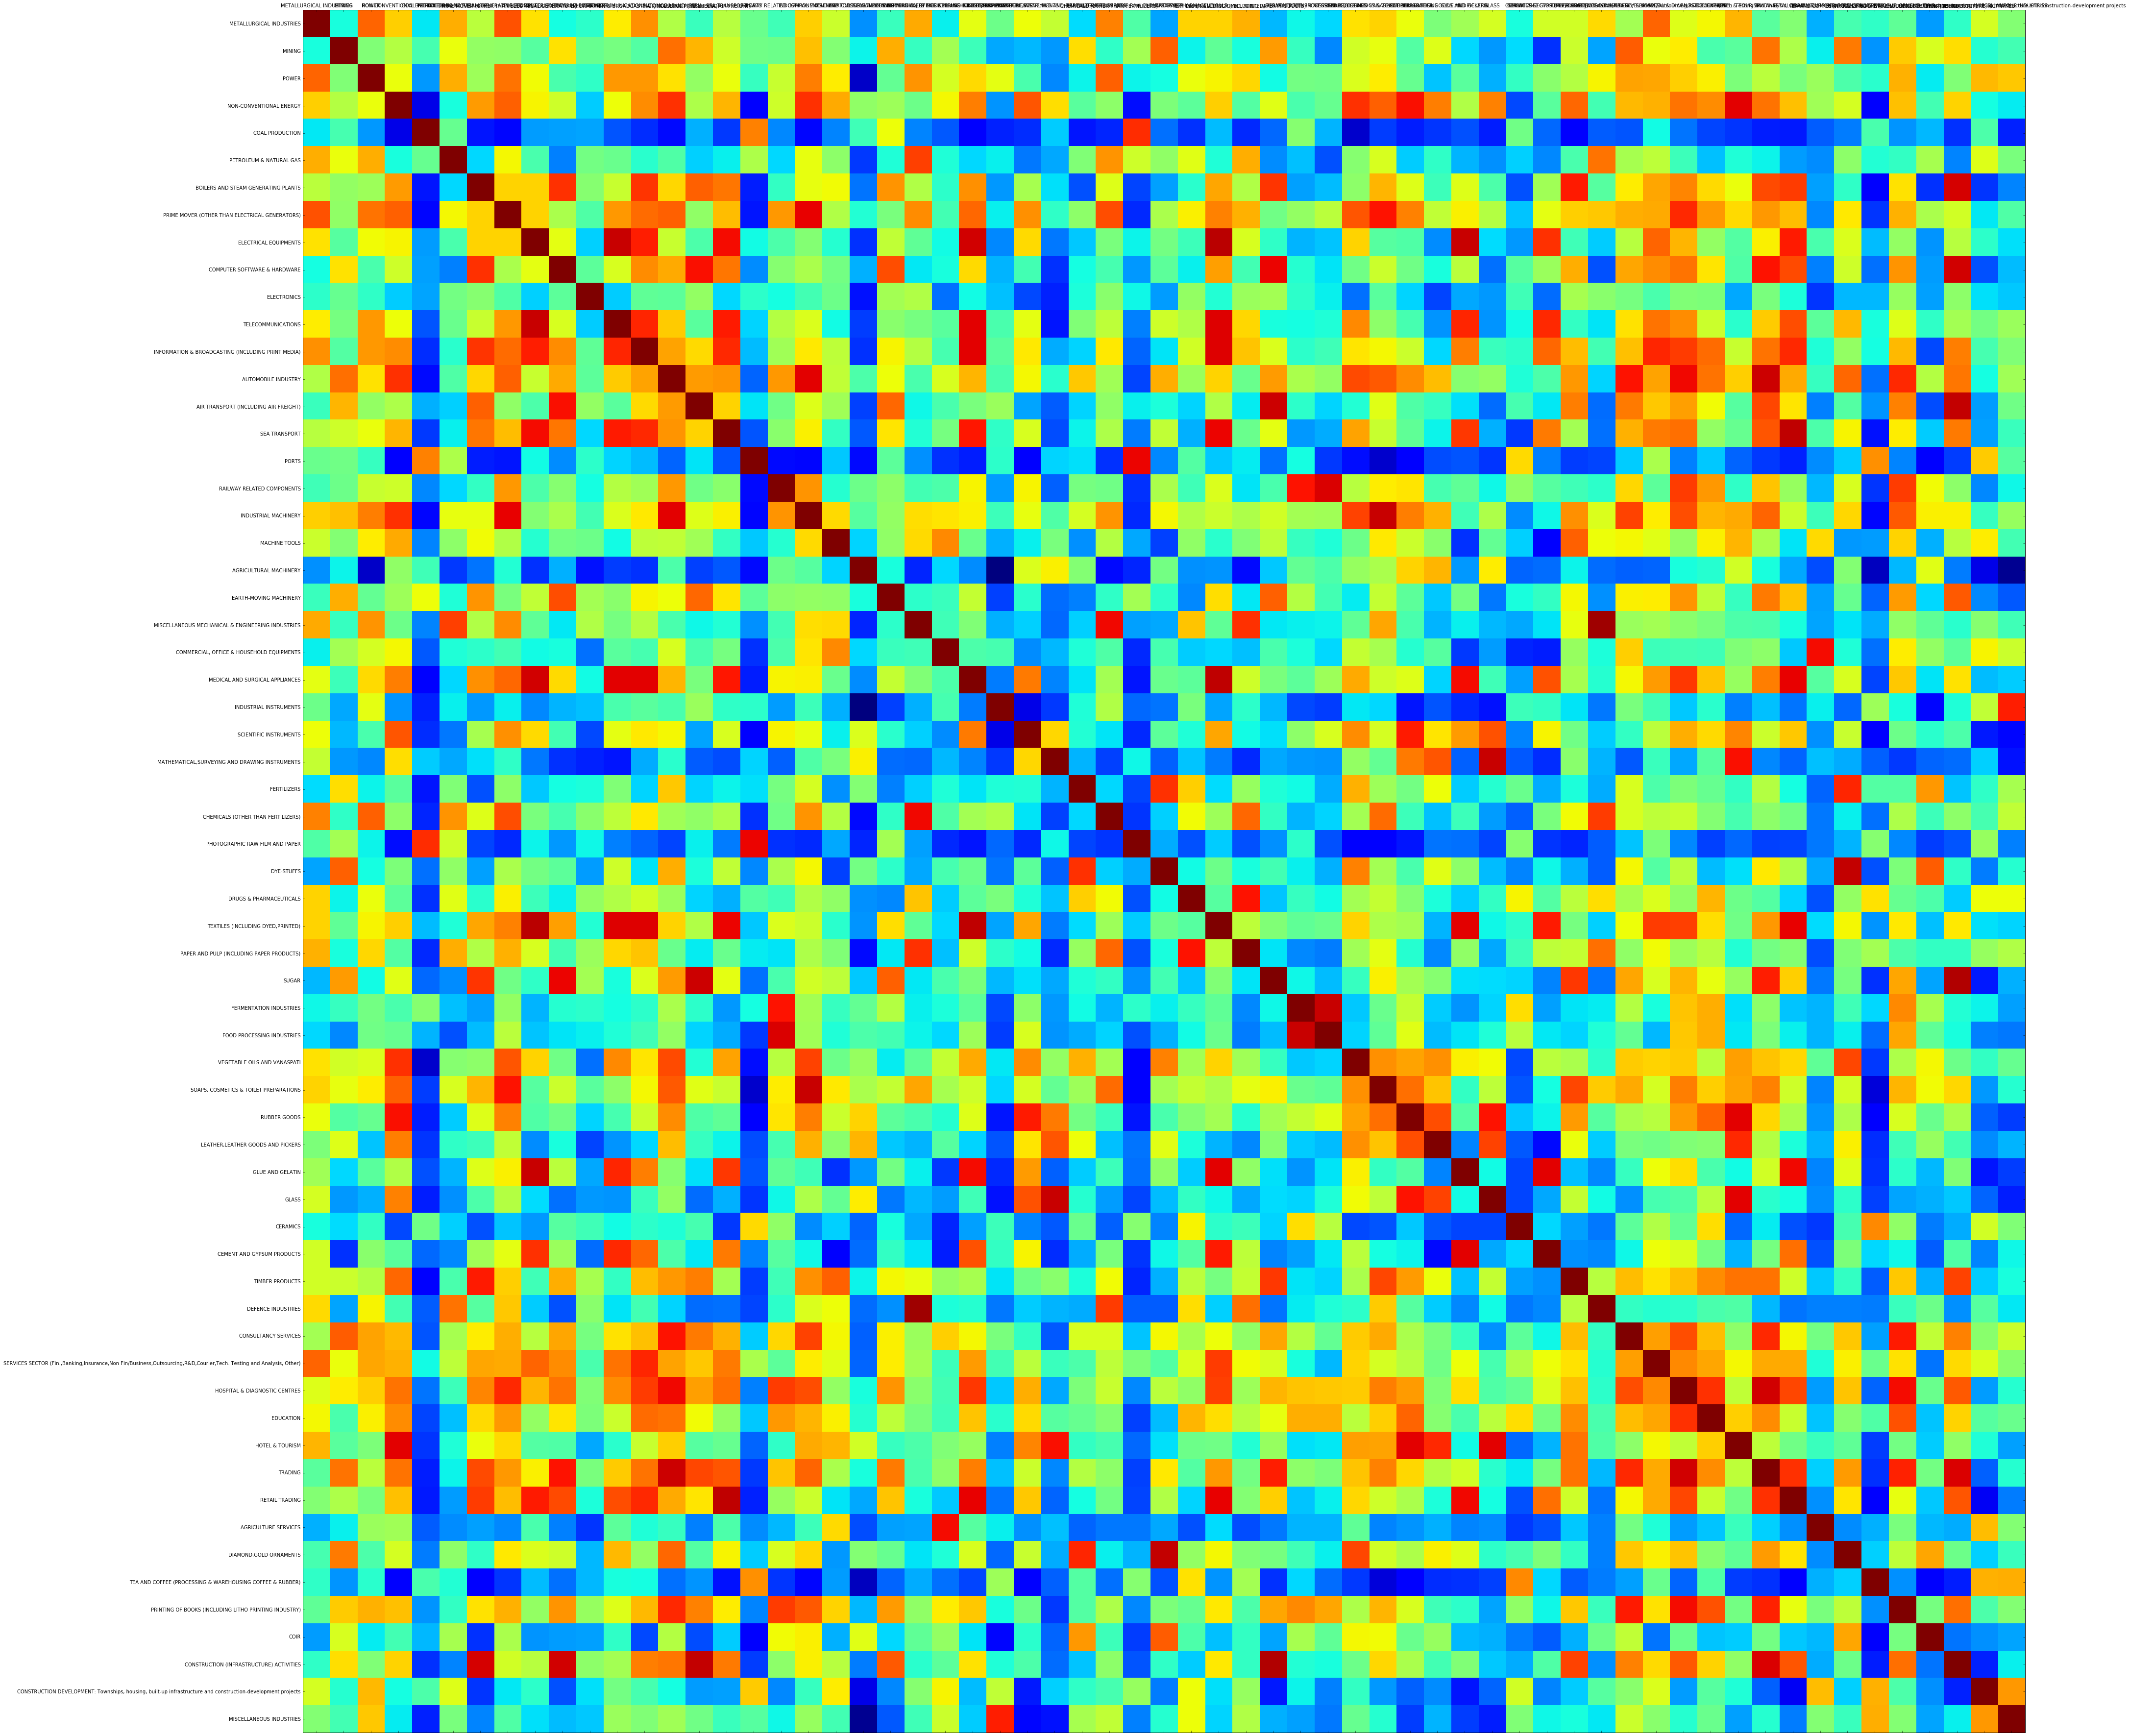

In [10]:
#matriz correlación
corr=plt.matshow(india.corr())

corr = india.corr()
fig,ax = plt.subplots(figsize=(63, 63))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);